# DATA CLEANSING

Purpose of project: Analyze the monthly ridership totals of the MTA subway compared to delays, on time arrivals, and felony counts.

Problem Statement: Can I find correlation between MTA ridership numbers and issues that plague the systems performance: delays, timeliness, and safety In order to address areas where the MTA can become more efficient?

Beyond our initial finding, can I determine which factors within our datasets result in the dissuasion of ridership?


In [26]:
# import libraries

import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.api.types import is_period_dtype

In [28]:
# I know that some of the csv files that I am bringing in will have mismatching date formats
# So i will create a function normalize them into "date" columns

def month_to_date(df):
    df.columns = [col.lower() for col in df.columns]
    if 'month' in df.columns:
        df.rename(columns={'month': 'date'}, inplace=True)
    else:
        print('Already exists as "date"')

    return df


In [30]:
# I will define a function that creates a monthly total column
# In this function i need to:
# put date into datetime format
# Set date column as the index
# Select specific columns to aggregate
# Resample by monthly sum
# Combine sum and average dataframes
# Reset the index
# I will need added checks within the code as well


def monthly_agg1(df, date_column, columns_to_aggregate):
    # Check if the date_column exists in the DataFrame
    if date_column not in df.columns:
        print('avoiding error')
        return df  # Return the unmodified DataFrame
    
    # Make a copy of the DataFrame to avoid altering the original
    df_copy = df.copy()
    
    # Check if the date_column is already in datetime format
    if pd.api.types.is_datetime64_any_dtype(df_copy[date_column]):
        print('Date column is already in datetime format. Proceeding with resampling.')
    else:
        # Convert the date column to datetime format if it's not already
        df_copy[date_column] = pd.to_datetime(df_copy[date_column])
    
    
    df_copy.set_index(date_column, inplace=True)
    #print("Index before resampling:", df_copy.index)
    
    df_monthly_sum = df_copy[columns_to_aggregate].resample('M').sum()
    #print("DataFrame after resampling:", df_monthly_sum)

    df_monthly_sum.reset_index(inplace=True)
    
    return df_monthly_sum

In [32]:
# After making avg and total columns, I need to restandardize the date columns to YYYY-MM

def date_time(df, column_name):

    # convert the date column in a given dataframe to datetime
    df[column_name] = pd.to_datetime(df[column_name])
    df[column_name] = df[column_name].dt.strftime('%Y-%m')
    
    return df


In [34]:
# set all precentages to two decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [36]:
# import csv files
print(os.getcwd())
ridership = pd.read_csv('./data/Ridership.csv')
delays = pd.read_csv('./data/Delays.csv')
reliability = pd.read_csv('./data/On_Time_Performance.csv')
felonies = pd.read_csv('./data/Felonies2.csv')

/Users/wool/dev/capstonetwo


# RIDERSHIP

In [39]:
ridership.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,0.97,984908,0.99,NaN,NaN,55826,0.59,19922,1.13,786961,0.98,1636.00,0.52
1,03/02/2020,5329915,0.96,2209066,0.99,321569.00,1.03,180702,0.66,30338,1.02,874620,0.95,17140.00,1.07
2,03/03/2020,5481103,0.98,2228608,0.99,319727.00,1.02,190648,0.69,32767,1.10,882175,0.96,17453.00,1.09
3,03/04/2020,5498809,0.99,2177165,0.97,311662.00,0.99,192689,0.70,34297,1.15,905558,0.98,17136.00,1.07
4,03/05/2020,5496453,0.99,2244515,1.00,307597.00,0.98,194387,0.70,33209,1.12,929298,1.01,17203.00,1.08


In [41]:
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     1607 non-null   object 
 1   Subways: Total Estimated Ridership                       1607 non-null   int64  
 2   Subways: % of Comparable Pre-Pandemic Day                1607 non-null   float64
 3   Buses: Total Estimated Ridership                         1607 non-null   int64  
 4   Buses: % of Comparable Pre-Pandemic Day                  1607 non-null   float64
 5   LIRR: Total Estimated Ridership                          1606 non-null   float64
 6   LIRR: % of Comparable Pre-Pandemic Day                   1606 non-null   float64
 7   Metro-North: Total Estimated Ridership                   1607 non-null   int64  
 8   Metro-North: % of Comparable

In [43]:
# remove unnecessary columns and duplicates

columns_to_drop = ['Buses: Total Estimated Ridership',
                  'Buses: % of Comparable Pre-Pandemic Day',
                  'LIRR: Total Estimated Ridership', 
                  'LIRR: % of Comparable Pre-Pandemic Day',
                  'Metro-North: Total Estimated Ridership', 
                  'Metro-North: % of Comparable Pre-Pandemic Day', 
                  'Access-A-Ride: Total Scheduled Trips',
                  'Access-A-Ride: % of Comparable Pre-Pandemic Day', 
                  'Bridges and Tunnels: Total Traffic', 
                  'Bridges and Tunnels: % of Comparable Pre-Pandemic Day', 
                  'Staten Island Railway: Total Estimated Ridership', 
                  'Staten Island Railway: % of Comparable Pre-Pandemic Day',
                  'Subways: % of Comparable Pre-Pandemic Day'
]

# Drop predetermined drop columns
r_cleaned = ridership.drop_duplicates() 
r_cleaned = ridership.drop(columns=columns_to_drop)  # Assigning the result of drop to r_cleaned
r_cleaned = r_cleaned.rename(columns={'Subways: Total Estimated Ridership': 'Estimated Ridership'})

r_cleaned.head()

,Date,Estimated Ridership
0,03/01/2020,2212965
1,03/02/2020,5329915
2,03/03/2020,5481103
3,03/04/2020,5498809
4,03/05/2020,5496453


In [45]:
# Run date time functions

r_cleaned = month_to_date(r_cleaned)

r_cleaned.head()

Already exists as "date"


,date,estimated ridership
0,03/01/2020,2212965
1,03/02/2020,5329915
2,03/03/2020,5481103
3,03/04/2020,5498809
4,03/05/2020,5496453


In [47]:
print([col for col in r_cleaned.columns])

['date', 'estimated ridership']


In [49]:
# aggregate columns

date_column = 'date'
columns_to_aggregate = ['estimated ridership']

ridership_df = monthly_agg1(r_cleaned, date_column, columns_to_aggregate)

ridership_df.head()
ridership_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 53 non-null     datetime64[ns]
 1   estimated ridership  53 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 980.0 bytes


In [51]:
# Return to standardized datetime
date_time(ridership_df, 'date')

ridership_df.head()

,date,estimated ridership
0,2020-03,73625223
1,2020-04,11730474
2,2020-05,15275851
3,2020-06,23928304
4,2020-07,32508961


In [53]:
ridership_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 53 non-null     object
 1   estimated ridership  53 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 980.0+ bytes


In [55]:
ridership_df.to_csv('./output/RidershipForTab.csv', index=False)

# FELONIES

In [58]:
# show next csv
felonies

,Month,Agency,Police Force,Felony Type,Felony Count,Crimes per Million Riders
0,01/01/2020,MNR,MTAPD,Burglary,0,0.00
1,01/01/2020,MNR,MTAPD,Felony Assault,1,0.14
2,01/01/2020,MNR,MTAPD,Murder,0,0.00
3,01/01/2020,MNR,MTAPD,Rape,0,0.00
4,01/01/2020,MNR,MTAPD,Robbery,3,0.43
...,...,...,...,...,...,...
1337,05/01/2024,NYCT,NYPD,Murder,0,NaN
1338,05/01/2024,NYCT,NYPD,Rape,0,NaN
1339,05/01/2024,NYCT,NYPD,Robbery,41,NaN
1340,05/01/2024,NYCT,NYPD,Grand Larceny,95,NaN


In [60]:
# I am only looking at the values for the NYCT agency, so i will drop all rows that give data otherwise
f_nyct = felonies.loc[felonies['Agency'] == 'NYCT'].copy()

f_nyct

,Month,Agency,Police Force,Felony Type,Felony Count,Crimes per Million Riders
14,01/01/2020,NYCT,NYPD,Burglary,0,0.00
15,01/01/2020,NYCT,NYPD,Felony Assault,33,0.18
16,01/01/2020,NYCT,NYPD,Murder,0,0.00
17,01/01/2020,NYCT,NYPD,Rape,1,0.01
18,01/01/2020,NYCT,NYPD,Robbery,75,0.41
...,...,...,...,...,...,...
1337,05/01/2024,NYCT,NYPD,Murder,0,NaN
1338,05/01/2024,NYCT,NYPD,Rape,0,NaN
1339,05/01/2024,NYCT,NYPD,Robbery,41,NaN
1340,05/01/2024,NYCT,NYPD,Grand Larceny,95,NaN


In [62]:
# remove unecessary columns and duplicates - I only need felony count and felony type

ffff = f_nyct.drop(columns=['Agency', 'Police Force', 'Felony Type', 'Crimes per Million Riders'])
#ffff = ffff.rename(columns={'Month': 'date'})

ffff.head()

,Month,Felony Count
14,01/01/2020,0
15,01/01/2020,33
16,01/01/2020,0
17,01/01/2020,1
18,01/01/2020,75


In [64]:
# Run date time functions
f = month_to_date(ffff)

f.head()

,date,felony count
14,01/01/2020,0
15,01/01/2020,33
16,01/01/2020,0
17,01/01/2020,1
18,01/01/2020,75


In [66]:
print([col for col in ffff.columns])

['date', 'felony count']


In [68]:
# aggregate monthly values
date_column = 'date'
columns_to_aggregate = ['felony count']

fels = monthly_agg1(ffff, date_column, columns_to_aggregate)

fels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          53 non-null     datetime64[ns]
 1   felony count  53 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 980.0 bytes


In [70]:
df = fels
column_name = 'date'

date_time(df, column_name)

fels.head()

,date,felony count
0,2020-01,261
1,2020-02,266
2,2020-03,173
3,2020-04,121
4,2020-05,85


# DELAYS

In [73]:
# show next csv
delays.head()

,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-06,A DIVISION,1,1,Crew Availability,Crew Availability,84
1,2024-06,A DIVISION,1,1,External Factors,External Debris on Roadbed,5
2,2024-06,A DIVISION,1,1,Infrastructure & Equipment,Braking,36
3,2024-06,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,38
4,2024-06,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",14


In [75]:
delays.isnull().sum()

month                    0
division                 0
line                     0
day_type                 0
reporting_category       0
subcategory           2167
delays                   0
dtype: int64

In [77]:
pd.set_option('display.max_rows', None)
nulls = delays[delays['subcategory'].isnull()]
nulls

,month,division,line,day_type,reporting_category,subcategory,delays
12,2024-06,A DIVISION,1,1,Operating Conditions,NaN,217
27,2024-06,A DIVISION,1,2,Operating Conditions,NaN,47
45,2024-06,A DIVISION,2,1,Operating Conditions,NaN,265
65,2024-06,A DIVISION,2,2,Operating Conditions,NaN,387
83,2024-06,A DIVISION,3,1,Operating Conditions,NaN,155
99,2024-06,A DIVISION,3,2,Operating Conditions,NaN,112
118,2024-06,A DIVISION,4,1,Operating Conditions,NaN,249
133,2024-06,A DIVISION,4,2,Operating Conditions,NaN,177
154,2024-06,A DIVISION,5,1,Operating Conditions,NaN,193
169,2024-06,A DIVISION,5,2,Operating Conditions,NaN,122


In [78]:
delays['subcategory'] = delays['subcategory'].fillna('Operating Conditions')
delays.isnull().sum()

month                 0
division              0
line                  0
day_type              0
reporting_category    0
subcategory           0
delays                0
dtype: int64

In [79]:
pd.reset_option('display.max_rows')

In [83]:
# change day_type from number to str

delays['day_type'] = delays['day_type'].astype(str)

In [85]:
# specificy day_type as weeekday or weekend

delays.loc[delays['day_type'] == '1', 'day_type'] = 'weekday'
delays.loc[delays['day_type'] == '2', 'day_type'] = 'weekend'

delays

,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-06,A DIVISION,1,weekday,Crew Availability,Crew Availability,84
1,2024-06,A DIVISION,1,weekday,External Factors,External Debris on Roadbed,5
2,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Braking,36
3,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Door-Related,38
4,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,"Fire, Smoke, Debris",14
...,...,...,...,...,...,...,...
36918,2020-01,Systemwide,Systemwide,weekend,External Factors,Systemwide,348
36919,2020-01,Systemwide,Systemwide,weekend,Infrastructure & Equipment,Systemwide,1480
36920,2020-01,Systemwide,Systemwide,weekend,Operating Conditions,Systemwide,1557
36921,2020-01,Systemwide,Systemwide,weekend,Planned ROW Work,Systemwide,1938


In [87]:
# standardize date column name
month_to_date(delays)

,date,division,line,day_type,reporting_category,subcategory,delays
0,2024-06,A DIVISION,1,weekday,Crew Availability,Crew Availability,84
1,2024-06,A DIVISION,1,weekday,External Factors,External Debris on Roadbed,5
2,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Braking,36
3,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Door-Related,38
4,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,"Fire, Smoke, Debris",14
...,...,...,...,...,...,...,...
36918,2020-01,Systemwide,Systemwide,weekend,External Factors,Systemwide,348
36919,2020-01,Systemwide,Systemwide,weekend,Infrastructure & Equipment,Systemwide,1480
36920,2020-01,Systemwide,Systemwide,weekend,Operating Conditions,Systemwide,1557
36921,2020-01,Systemwide,Systemwide,weekend,Planned ROW Work,Systemwide,1938


In [89]:
# NOW for a fun bit
# I need to see the data across all of the unique variables within the delays dataframe
# I will write code that aggregates all of the columns and picots them
# to return a monthly total dataframe

# Check if 'date' is not already in PeriodDtype to prevent reprocessing
if not isinstance(delays['date'].dtype, pd.PeriodDtype):

    # Convert 'date' to monthly datetime
    delays['date'] = pd.to_datetime(delays['date'])
    delays['date'] = delays['date'].dt.to_period('M')

    # create new DataFrame
    delays_df = delays[['date']].drop_duplicates().reset_index(drop=True)

    # Aggregate and pivot data for each column
    def aggregate_and_pivot(df, group_col, agg_col):
        delays_agg_df = df.groupby(['date', group_col])[agg_col].sum().reset_index()
        delays_pivot_df = delays_agg_df.pivot(index='date', columns=group_col, values=agg_col).fillna(0).reset_index()
        return delays_pivot_df

    # Pivot and merge
    for col in ['division', 'line', 'day_type', 'reporting_category', 'subcategory']:
        pivot_df = aggregate_and_pivot(delays, col, 'delays')
        delays_df = delays_df.merge(pivot_df, on='date', how='left')

    # get total delays per month
    total_delays = delays.groupby('date')['delays'].sum().reset_index()
    total_delays.rename(columns={'delays': 'total_delays_per_month'}, inplace=True)
    delays_df = delays_df.merge(total_delays, on='date', how='left')

    # Reset index
    delays_df.reset_index(drop=True, inplace=True)

    # Display
    print('DataFrame has been aggregated')
    display(delays_df.info())

else:
    print('Already aggregated')
    display(delays_df)


DataFrame has been aggregated
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype    
---  ------                                  --------------  -----    
 0   date                                    54 non-null     period[M]
 1   A DIVISION                              54 non-null     int64    
 2   B DIVISION                              54 non-null     int64    
 3   Systemwide_x                            54 non-null     int64    
 4   1                                       54 non-null     float64  
 5   2                                       54 non-null     float64  
 6   3                                       54 non-null     float64  
 7   4                                       54 non-null     float64  
 8   5                                       54 non-null     float64  
 9   6                                       54 non-null     float64  
 10  7         

None

In [91]:
delays_df = delays_df.rename(columns={'A DIVISION': 'Number Trains',
                                     'B DIVISION': 'Letter Trains',
                                     'Systemwide_x': 'Number and Letter Trains',
                                     'Systemwide': 'Systemwide Failure',
                                     'Train Brake Activation - Cause Unknown': 'Brake Activation',
                                     'Subways Maintenance': 'Subways Maintenance'})

In [93]:
# return delays dataframe to standardized datetime
# turns out i had to bring it from a period to a string to date time before using my function

delays_df['date'] = delays_df['date'].astype(str)
delays_df['date'] = pd.to_datetime(delays_df['date'])
delays_df.dtypes

delays_df

,date,Number Trains,Letter Trains,Number and Letter Trains,1,2,3,4,5,6,...,"Public Conduct, Crime, Police Response",Rail and Roadbed,Service Delivery,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Systemwide Failure,Brake Activation,Work Equipment,total_delays_per_month
0,2024-06-01,14381,22873,37254,1965.00,2681.00,1268.00,1974.00,1636.00,3277.00,...,5366.00,920.00,1152.00,1051.00,221.00,7737.00,37254.00,444.00,474.00,74508
1,2024-05-01,13977,24697,38674,2256.00,2178.00,1012.00,2049.00,1410.00,3599.00,...,6336.00,2137.00,1435.00,1569.00,250.00,8086.00,38674.00,358.00,1005.00,77348
2,2024-04-01,15764,25621,41385,2709.00,2732.00,1499.00,1993.00,1721.00,3330.00,...,6369.00,1744.00,1407.00,1492.00,610.00,8658.00,41385.00,340.00,633.00,82770
3,2024-03-01,16111,26059,42170,2288.00,2964.00,1592.00,2146.00,1701.00,4510.00,...,5822.00,1846.00,952.00,1654.00,289.00,8483.00,42170.00,392.00,559.00,84340
4,2024-02-01,16230,27036,43266,2586.00,3300.00,1309.00,2459.00,1666.00,3697.00,...,5562.00,1938.00,809.00,1703.00,569.00,8612.00,43266.00,285.00,560.00,86532
5,2024-01-01,17363,28561,45924,2987.00,2799.00,1696.00,2355.00,1843.00,3537.00,...,6007.00,1888.00,973.00,1873.00,229.00,7634.00,45924.00,316.00,562.00,91848
6,2023-12-01,16630,26890,43520,2534.00,2737.00,1380.00,2168.00,1699.00,3762.00,...,5683.00,1031.00,960.00,1633.00,226.00,6961.00,43520.00,133.00,351.00,87040
7,2023-11-01,14549,23817,38366,1728.00,2654.00,1054.00,1800.00,1772.00,3703.00,...,4806.00,860.00,973.00,1304.00,306.00,6738.00,38366.00,55.00,483.00,76732
8,2023-10-01,16277,24705,40982,2396.00,3142.00,1568.00,2068.00,1760.00,3334.00,...,5652.00,1110.00,890.00,1296.00,384.00,6759.00,40982.00,136.00,414.00,81964
9,2023-09-01,14263,27758,42021,2238.00,2481.00,1333.00,1942.00,1552.00,3327.00,...,5440.00,1791.00,642.00,1204.00,374.00,6120.00,42021.00,221.00,359.00,84042


In [95]:
date_time(delays_df, 'date')

,date,Number Trains,Letter Trains,Number and Letter Trains,1,2,3,4,5,6,...,"Public Conduct, Crime, Police Response",Rail and Roadbed,Service Delivery,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Systemwide Failure,Brake Activation,Work Equipment,total_delays_per_month
0,2024-06,14381,22873,37254,1965.00,2681.00,1268.00,1974.00,1636.00,3277.00,...,5366.00,920.00,1152.00,1051.00,221.00,7737.00,37254.00,444.00,474.00,74508
1,2024-05,13977,24697,38674,2256.00,2178.00,1012.00,2049.00,1410.00,3599.00,...,6336.00,2137.00,1435.00,1569.00,250.00,8086.00,38674.00,358.00,1005.00,77348
2,2024-04,15764,25621,41385,2709.00,2732.00,1499.00,1993.00,1721.00,3330.00,...,6369.00,1744.00,1407.00,1492.00,610.00,8658.00,41385.00,340.00,633.00,82770
3,2024-03,16111,26059,42170,2288.00,2964.00,1592.00,2146.00,1701.00,4510.00,...,5822.00,1846.00,952.00,1654.00,289.00,8483.00,42170.00,392.00,559.00,84340
4,2024-02,16230,27036,43266,2586.00,3300.00,1309.00,2459.00,1666.00,3697.00,...,5562.00,1938.00,809.00,1703.00,569.00,8612.00,43266.00,285.00,560.00,86532
5,2024-01,17363,28561,45924,2987.00,2799.00,1696.00,2355.00,1843.00,3537.00,...,6007.00,1888.00,973.00,1873.00,229.00,7634.00,45924.00,316.00,562.00,91848
6,2023-12,16630,26890,43520,2534.00,2737.00,1380.00,2168.00,1699.00,3762.00,...,5683.00,1031.00,960.00,1633.00,226.00,6961.00,43520.00,133.00,351.00,87040
7,2023-11,14549,23817,38366,1728.00,2654.00,1054.00,1800.00,1772.00,3703.00,...,4806.00,860.00,973.00,1304.00,306.00,6738.00,38366.00,55.00,483.00,76732
8,2023-10,16277,24705,40982,2396.00,3142.00,1568.00,2068.00,1760.00,3334.00,...,5652.00,1110.00,890.00,1296.00,384.00,6759.00,40982.00,136.00,414.00,81964
9,2023-09,14263,27758,42021,2238.00,2481.00,1333.00,1942.00,1552.00,3327.00,...,5440.00,1791.00,642.00,1204.00,374.00,6120.00,42021.00,221.00,359.00,84042


# RELIABILITY

In [98]:
# show next csv
reliability.head()

,month,division,line,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2024-06,A DIVISION,1,1,7536,9237,0.82
1,2024-06,A DIVISION,1,2,3346,3610,0.93
2,2024-06,A DIVISION,2,1,4777,6552,0.73
3,2024-06,A DIVISION,2,2,1547,2457,0.63
4,2024-06,A DIVISION,3,2,1671,2114,0.79


In [100]:
# remove unecessary columns and duplicates
rel_cleaned = reliability.drop(columns=['division', 'line', 'day_type', 'terminal_on_time_performance'])

rel_cleaned.head()

,month,num_on_time_trips,num_sched_trips
0,2024-06,7536,9237
1,2024-06,3346,3610
2,2024-06,4777,6552
3,2024-06,1547,2457
4,2024-06,1671,2114


In [102]:
# Run date time functions
rel_cleaned = month_to_date(rel_cleaned)

rel_cleaned.head()

,date,num_on_time_trips,num_sched_trips
0,2024-06,7536,9237
1,2024-06,3346,3610
2,2024-06,4777,6552
3,2024-06,1547,2457
4,2024-06,1671,2114


In [104]:
# aggregate columns
date_column = 'date'
columns_to_aggregate = ['num_on_time_trips', 'num_sched_trips']

rel_df = monthly_agg1(rel_cleaned, date_column, columns_to_aggregate)

rel_df.head()

,date,num_on_time_trips,num_sched_trips
0,2020-01-31,385398,459746
1,2020-02-29,354546,422266
2,2020-03-31,278978,322004
3,2020-04-30,138456,163320
4,2020-05-31,310466,328934


In [106]:
# rename long columns

rel_df = rel_df.rename(columns={'num_on_time_trips': 'on_time_trips',
                             'num_sched_trips': 'sched_trips',
                             'num_on_time_trips_avg': 'num_trips_avg'})

rel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           54 non-null     datetime64[ns]
 1   on_time_trips  54 non-null     int64         
 2   sched_trips    54 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.4 KB


In [108]:
# return to standardized date time
date_time(rel_df, 'date')

rel_df.head()

,date,on_time_trips,sched_trips
0,2020-01,385398,459746
1,2020-02,354546,422266
2,2020-03,278978,322004
3,2020-04,138456,163320
4,2020-05,310466,328934


In [110]:
rel_df.info()
output_csv_path = './output/crazyReliability.csv'
rel_df.to_csv(output_csv_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           54 non-null     object
 1   on_time_trips  54 non-null     int64 
 2   sched_trips    54 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


# MERGING

In [113]:
RF = ridership_df.merge(fels, on='date', how='left')
RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 53 non-null     object 
 1   estimated ridership  53 non-null     int64  
 2   felony count         51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [115]:
RFR = RF.merge(rel_df, on='date', how='left')
RFR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 53 non-null     object 
 1   estimated ridership  53 non-null     int64  
 2   felony count         51 non-null     float64
 3   on_time_trips        52 non-null     float64
 4   sched_trips          52 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [117]:
RFRD = RFR.merge(delays_df, on='date', how='left')
RFRD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    53 non-null     object 
 1   estimated ridership                     53 non-null     int64  
 2   felony count                            51 non-null     float64
 3   on_time_trips                           52 non-null     float64
 4   sched_trips                             52 non-null     float64
 5   Number Trains                           52 non-null     float64
 6   Letter Trains                           52 non-null     float64
 7   Number and Letter Trains                52 non-null     float64
 8   1                                       52 non-null     float64
 9   2                                       52 non-null     float64
 10  3                                       52 non-null     float64


In [119]:
# I need to make a column showing the average on time performance
RFRD['on_time_percentage'] = (RFRD['on_time_trips'] / RFRD['sched_trips']) * 100
RFRD['date'] = pd.to_datetime(RFRD['date'])
output_csv_path = './output/RFRDmerge.csv'
RFRD.to_csv(output_csv_path, index=False)
RFRD.head()

,date,estimated ridership,felony count,on_time_trips,sched_trips,Number Trains,Letter Trains,Number and Letter Trains,1,2,...,Rail and Roadbed,Service Delivery,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Systemwide Failure,Brake Activation,Work Equipment,total_delays_per_month,on_time_percentage
0,2020-03-01,73625223,173.00,278978.00,322004.00,6663.00,14849.00,21512.00,665.00,1128.00,...,765.00,374.00,964.00,0.00,4426.00,21512.00,176.00,273.00,43024.00,86.64
1,2020-04-01,11730474,121.00,138456.00,163320.00,4584.00,7846.00,12430.00,323.00,1000.00,...,126.00,173.00,168.00,0.00,762.00,12430.00,16.00,80.00,24860.00,84.78
2,2020-05-01,15275851,85.00,310466.00,328934.00,4099.00,5160.00,9259.00,299.00,1032.00,...,433.00,239.00,363.00,0.00,1346.00,9259.00,83.00,211.00,18518.00,94.39
3,2020-06-01,23928304,106.00,361344.00,392324.00,5784.00,9713.00,15497.00,436.00,1088.00,...,601.00,389.00,357.00,0.00,1882.00,15497.00,147.00,438.00,30994.00,92.10
4,2020-07-01,32508961,107.00,377606.00,421818.00,7775.00,14341.00,22116.00,711.00,1575.00,...,1153.00,400.00,524.00,0.00,2750.00,22116.00,242.00,453.00,44232.00,89.52


# INSIGHTS

Now that I have cleaned and merged the data into a common format, I will explore the relationships between the different factors and how they influence ridership


In [122]:
RFRD.describe()

,date,estimated ridership,felony count,on_time_trips,sched_trips,Number Trains,Letter Trains,Number and Letter Trains,1,2,...,Rail and Roadbed,Service Delivery,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Systemwide Failure,Brake Activation,Work Equipment,total_delays_per_month,on_time_percentage
count,53,53.00,51.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,...,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00
mean,2022-05-01 21:44:09.056603648,74509767.06,163.63,364329.08,433136.38,12305.42,22088.10,34393.52,1726.35,2248.27,...,1226.33,655.08,1024.62,197.54,5051.63,34393.52,271.23,388.27,68787.04,84.22
min,2020-03-01 00:00:00,11730474.00,85.00,138456.00,163320.00,4099.00,5160.00,9259.00,299.00,1000.00,...,126.00,173.00,168.00,0.00,762.00,9259.00,16.00,80.00,18518.00,79.56
25%,2021-04-01 00:00:00,58435642.00,120.50,361088.50,433501.00,10487.25,16342.25,27651.00,1322.75,1922.75,...,874.25,416.50,715.75,0.00,3679.50,27651.00,182.75,293.25,55302.00,81.69
50%,2022-05-01 00:00:00,83273427.00,170.00,373017.00,445771.00,12948.50,24745.50,38100.50,1849.00,2219.00,...,1158.00,647.50,1014.50,71.50,5161.50,38100.50,239.00,364.50,76201.00,83.12
75%,2023-06-01 00:00:00,93997299.00,193.50,383396.00,453997.00,14594.25,26547.50,41082.75,2122.75,2693.75,...,1694.50,850.75,1278.75,356.25,6307.25,41082.75,359.25,450.00,82165.50,85.82
max,2024-07-01 00:00:00,105903207.00,233.00,415414.00,467956.00,17363.00,30862.00,46448.00,2987.00,3300.00,...,2329.00,1435.00,1873.00,1063.00,8658.00,46448.00,530.00,1005.00,92896.00,94.39
std,NaN,24900779.86,39.43,40109.76,48362.58,3191.74,6285.34,9238.92,627.92,545.00,...,502.15,284.13,399.50,251.86,1856.40,9238.92,125.98,145.40,18477.84,3.59


In [124]:
RFRD.isnull().sum()

date                      0
estimated ridership       0
felony count              2
on_time_trips             1
sched_trips               1
                         ..
Systemwide Failure        1
Brake Activation          1
Work Equipment            1
total_delays_per_month    1
on_time_percentage        1
Length: 68, dtype: int64

In [126]:
RFRD.nunique()

date                      53
estimated ridership       53
felony count              43
on_time_trips             52
sched_trips               52
                          ..
Systemwide Failure        52
Brake Activation          48
Work Equipment            48
total_delays_per_month    52
on_time_percentage        52
Length: 68, dtype: int64

In [128]:
RFRD.sort_values(by='estimated ridership')

,date,estimated ridership,felony count,on_time_trips,sched_trips,Number Trains,Letter Trains,Number and Letter Trains,1,2,...,Rail and Roadbed,Service Delivery,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Systemwide Failure,Brake Activation,Work Equipment,total_delays_per_month,on_time_percentage
1,2020-04-01,11730474,121.00,138456.00,163320.00,4584.00,7846.00,12430.00,323.00,1000.00,...,126.00,173.00,168.00,0.00,762.00,12430.00,16.00,80.00,24860.00,84.78
2,2020-05-01,15275851,85.00,310466.00,328934.00,4099.00,5160.00,9259.00,299.00,1032.00,...,433.00,239.00,363.00,0.00,1346.00,9259.00,83.00,211.00,18518.00,94.39
3,2020-06-01,23928304,106.00,361344.00,392324.00,5784.00,9713.00,15497.00,436.00,1088.00,...,601.00,389.00,357.00,0.00,1882.00,15497.00,147.00,438.00,30994.00,92.10
4,2020-07-01,32508961,107.00,377606.00,421818.00,7775.00,14341.00,22116.00,711.00,1575.00,...,1153.00,400.00,524.00,0.00,2750.00,22116.00,242.00,453.00,44232.00,89.52
5,2020-08-01,35197734,110.00,392232.00,439766.00,10242.00,13528.00,23770.00,691.00,1890.00,...,621.00,437.00,619.00,3.00,3713.00,23770.00,231.00,592.00,47540.00,89.19
11,2021-02-01,39143573,104.00,333034.00,396384.00,11489.00,16650.00,28139.00,1603.00,2258.00,...,888.00,336.00,720.00,0.00,2385.00,28139.00,108.00,359.00,56278.00,84.02
10,2021-01-01,41101382,114.00,378646.00,423844.00,9468.00,13134.00,22602.00,1249.00,1987.00,...,816.00,515.00,613.00,0.00,3182.00,22602.00,175.00,396.00,45204.00,89.34
6,2020-09-01,42790545,113.00,387852.00,434016.00,8081.00,15006.00,23087.00,829.00,1899.00,...,1077.00,367.00,565.00,10.00,4554.00,23087.00,172.00,475.00,46174.00,89.36
9,2020-12-01,43468179,118.00,397862.00,450222.00,10768.00,15419.00,26187.00,1376.00,1874.00,...,716.00,575.00,731.00,0.00,3312.00,26187.00,142.00,246.00,52374.00,88.37
8,2020-11-01,43624401,110.00,381008.00,424948.00,8729.00,13288.00,22017.00,965.00,1944.00,...,578.00,369.00,630.00,0.00,2944.00,22017.00,202.00,276.00,44034.00,89.66


In [130]:
RFRD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    53 non-null     datetime64[ns]
 1   estimated ridership                     53 non-null     int64         
 2   felony count                            51 non-null     float64       
 3   on_time_trips                           52 non-null     float64       
 4   sched_trips                             52 non-null     float64       
 5   Number Trains                           52 non-null     float64       
 6   Letter Trains                           52 non-null     float64       
 7   Number and Letter Trains                52 non-null     float64       
 8   1                                       52 non-null     float64       
 9   2                                       52 non-null     

In [131]:
# Before digging into this portion of the dataset
# I'd like to create a visualization based off the percentage of ridership compared to pre-pandemic numbers

columns_to_drop = ['Buses: Total Estimated Ridership',
                  'Buses: % of Comparable Pre-Pandemic Day',
                  'LIRR: Total Estimated Ridership', 
                  'LIRR: % of Comparable Pre-Pandemic Day',
                  'Metro-North: Total Estimated Ridership', 
                  'Metro-North: % of Comparable Pre-Pandemic Day', 
                  'Access-A-Ride: Total Scheduled Trips',
                  'Access-A-Ride: % of Comparable Pre-Pandemic Day', 
                  'Bridges and Tunnels: Total Traffic', 
                  'Bridges and Tunnels: % of Comparable Pre-Pandemic Day', 
                  'Staten Island Railway: Total Estimated Ridership', 
                  'Staten Island Railway: % of Comparable Pre-Pandemic Day'
]

# Drop predetermined drop columns
r_g = ridership.drop_duplicates() 
r_g = ridership.drop(columns=columns_to_drop)  # Assigning the result of drop to r_cleaned
r_g = r_g.rename(columns={'Subways: Total Estimated Ridership': 'Estimated Ridership'})
r_g['Date'] = pd.to_datetime(r_g['Date'])

r_g.head()

,Date,Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day
0,2020-03-01,2212965,0.97
1,2020-03-02,5329915,0.96
2,2020-03-03,5481103,0.98
3,2020-03-04,5498809,0.99
4,2020-03-05,5496453,0.99


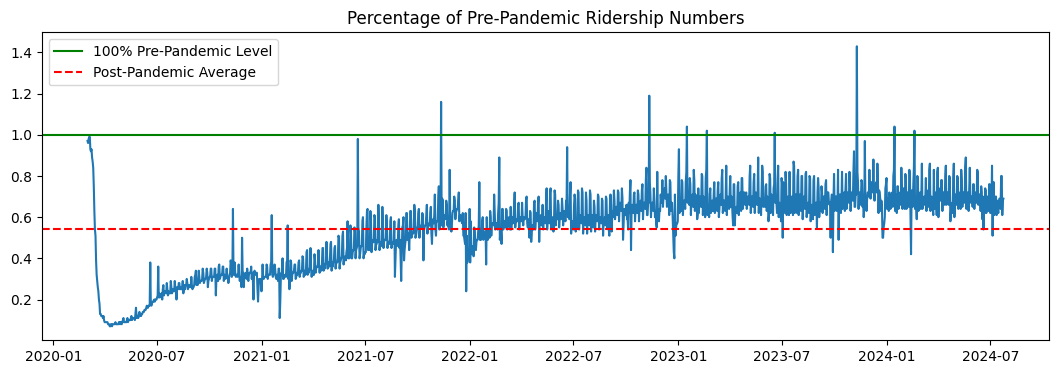

In [134]:
# Now that the ridership csv has been editted, I will plot it

average_ridership = ridership['Subways: % of Comparable Pre-Pandemic Day'].mean()

plt.figure(figsize=(13,4))
plt.plot(r_g['Date'], r_g['Subways: % of Comparable Pre-Pandemic Day'])
plt.title('Percentage of Pre-Pandemic Ridership Numbers')
plt.axhline(y=1.0, color='g', linestyle='-', label='100% Pre-Pandemic Level')
plt.axhline(y=average_ridership, color='r', linestyle='--', label=f'Post-Pandemic Average')
plt.legend()
plt.show()

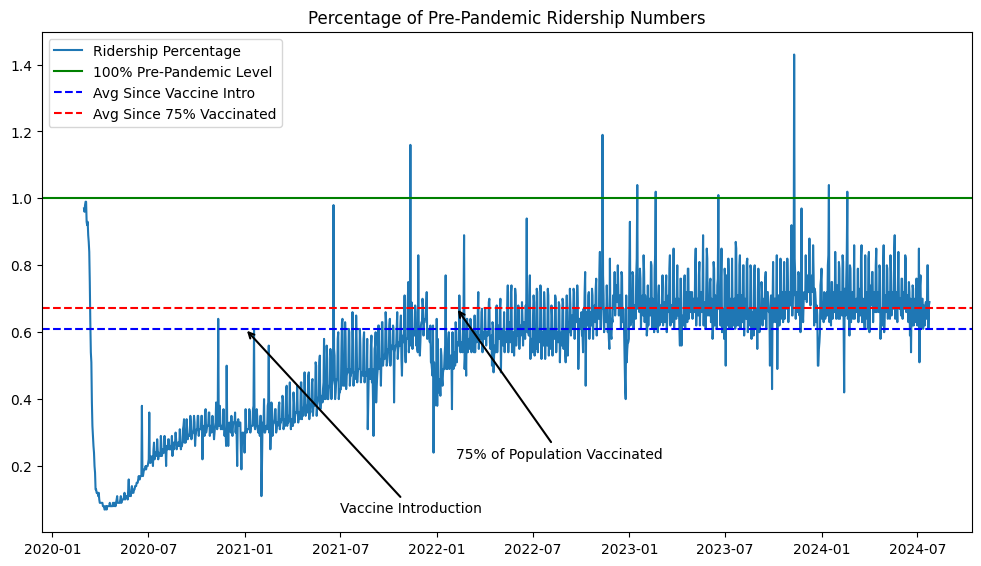

In [135]:
date1 = '2021-01-01'
date2 = '2022-02-06'
date3 = pd.to_datetime('2022-02-06')
vaxroll = pd.to_datetime('2021-01-01')
ref=pd.to_datetime('2021-07-01')

average_ridership_since_date1 = r_g[r_g['Date'] >= date1]['Subways: % of Comparable Pre-Pandemic Day'].mean()
average_ridership_since_date2 = r_g[r_g['Date'] >= date2]['Subways: % of Comparable Pre-Pandemic Day'].mean()

plt.figure(figsize=(12, 6.5))
plt.plot(r_g['Date'], r_g['Subways: % of Comparable Pre-Pandemic Day'], label='Ridership Percentage')

plt.title('Percentage of Pre-Pandemic Ridership Numbers')
plt.axhline(y=1.0, color='g', linestyle='-', label='100% Pre-Pandemic Level')

plt.axhline(y=average_ridership_since_date1, color='b', linestyle='--', label=f'Avg Since Vaccine Intro')
plt.axhline(y=average_ridership_since_date2, color='r', linestyle='--', label=f'Avg Since 75% Vaccinated')
plt.legend()

plt.annotate(
    '75% of Population Vaccinated',
    xy=(date3, average_ridership_since_date2),
    xytext=(date3, average_ridership_since_date2 - 0.45),
    arrowprops=dict(
        facecolor='black',
        arrowstyle='->',
        lw=1.5,
    )
)

plt.annotate(
    'Vaccine Introduction',
    xy=(vaxroll, average_ridership_since_date1),
    xytext=(ref, average_ridership_since_date1 - 0.55),
    arrowprops=dict(
        facecolor='black',
        arrowstyle='->',
        lw=1.5,
    )
)
# Show plot
plt.show()


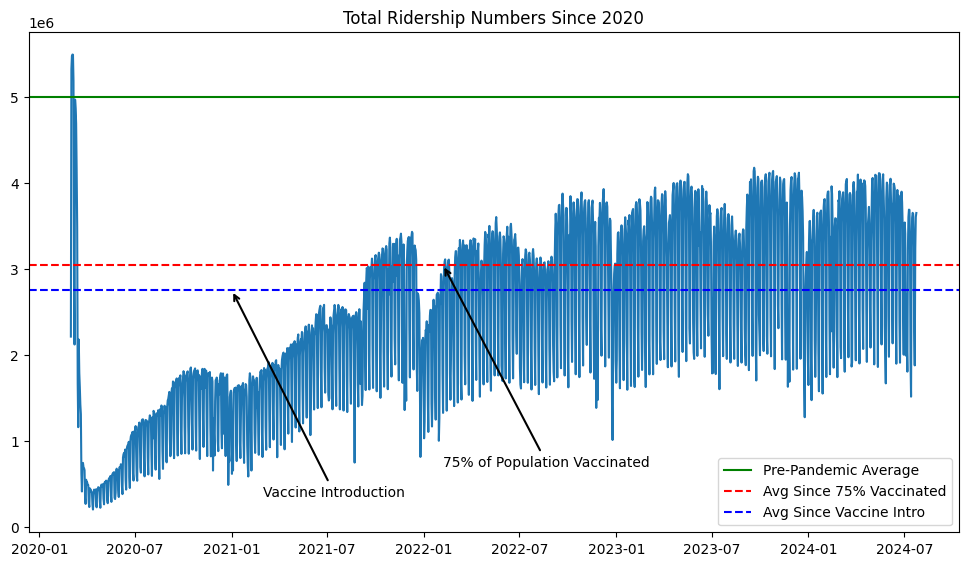

In [137]:
total_ridership = r_g['Estimated Ridership'].mean()

date1 = '2021-01-01'
date2 = '2022-02-06'
date3 = pd.to_datetime('2022-02-06')
ref2=pd.to_datetime('2021-03-01')

total_ridership_since_date1 = r_g[r_g['Date'] >= date1]['Estimated Ridership'].mean()
total_ridership_since_date2 = r_g[r_g['Date'] >= date2]['Estimated Ridership'].mean()

plt.figure(figsize=(12,6.5))
plt.plot(r_g['Date'], r_g['Estimated Ridership'])
plt.title('Total Ridership Numbers Since 2020')
plt.axhline(y=5e6, color='g', linestyle='-', label='Pre-Pandemic Average')
plt.axhline(y=total_ridership_since_date2, color='r', linestyle='--', label=f'Avg Since 75% Vaccinated')
plt.axhline(y=total_ridership_since_date1, color='b', linestyle='--', label=f'Avg Since Vaccine Intro')
plt.legend()

plt.annotate(
    '75% of Population Vaccinated',
    xy=(date3, total_ridership_since_date2),
    xytext=(date3, .7e6),
    arrowprops=dict(
        facecolor='black',
        arrowstyle='->',
        lw=1.5,
    )
)

plt.annotate(
    'Vaccine Introduction',
    xy=(vaxroll, total_ridership_since_date1),
    xytext=(ref2, .35e6),
    arrowprops=dict(
        facecolor='black',
        arrowstyle='->',
        lw=1.5,
    )
)
plt.show()

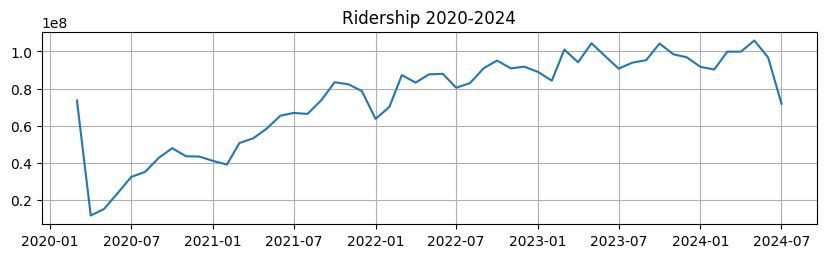

In [139]:
# Plot ridership over time

plt.figure(figsize=(10, 2.5))
plt.plot(RFRD['date'], RFRD['estimated ridership'])
plt.title('Ridership 2020-2024')
# plt.xlabel('Date')
# plt.ylabel('Riders')
plt.grid(True)

In [140]:
RFRD = RFRD.infer_objects(copy=False)
RFRD['felony count'] = RFRD['felony count'].interpolate(method='linear')

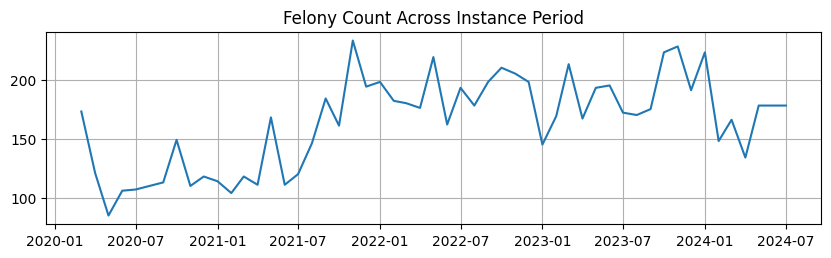

In [142]:
# Plot felonies over time

plt.figure(figsize=(10, 2.5))
plt.plot(RFRD['date'], RFRD['felony count'])
plt.title('Felony Count Across Instance Period')
# plt.xlabel('Date')
# plt.ylabel('Felonies')
plt.grid(True)
plt.show()

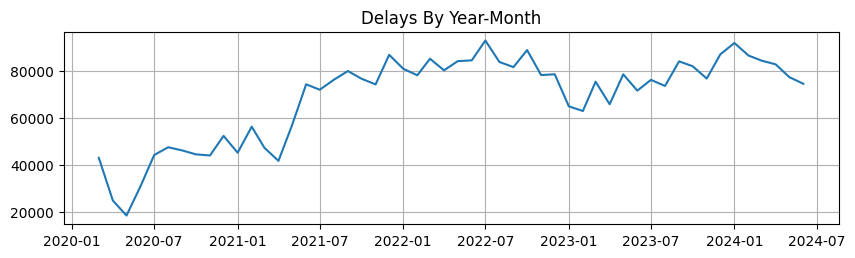

In [143]:
# Plot delays over time

plt.figure(figsize=(10, 2.5))
plt.plot(RFRD['date'], RFRD['total_delays_per_month'])
plt.title('Delays By Year-Month')
# plt.xlabel('Date')
# plt.ylabel('Delays')
plt.grid(True)



(0.0, 100.0)

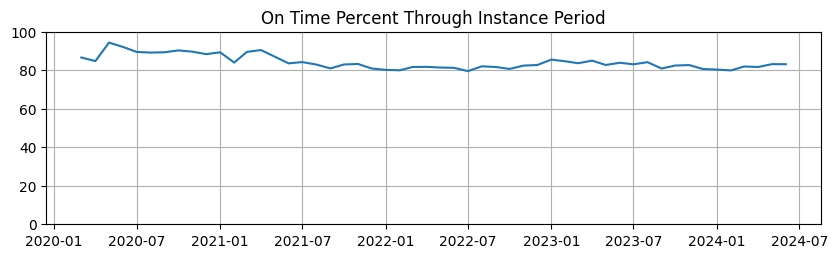

In [147]:
# Plot On Time Performance over time

plt.figure(figsize=(10, 2.5))
plt.plot(RFRD['date'], RFRD['on_time_percentage'])
plt.title('On Time Percent Through Instance Period')
# plt.xlabel('Date')
# plt.ylabel('Percent On Time')
plt.grid(True)
plt.ylim(0, 100)

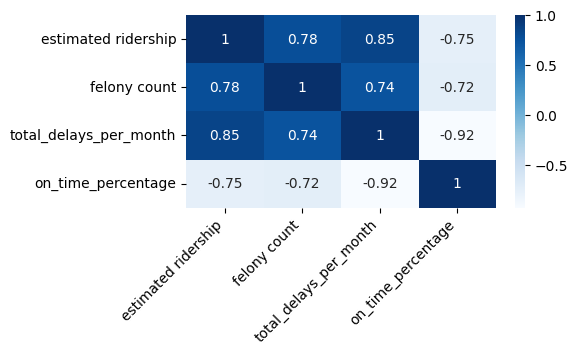

In [149]:
# I will look at correlation

corr_test_df = RFRD[['estimated ridership', 'felony count', 'total_delays_per_month', 'on_time_percentage']]

plt.figure(figsize=(5, 2.5))
sns.heatmap(corr_test_df.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=45, ha='right')

plt.show()

In [150]:
# Lets do a regression analysis between ridership and on time performance

keep_for_reg = ['date', 'estimated ridership', 'on_time_percentage']

rider_otp = RFRD[keep_for_reg]

rider_otp.head()

,date,estimated ridership,on_time_percentage
0,2020-03-01,73625223,86.64
1,2020-04-01,11730474,84.78
2,2020-05-01,15275851,94.39
3,2020-06-01,23928304,92.10
4,2020-07-01,32508961,89.52


In [152]:
rider_otp.isnull().sum()

date                   0
estimated ridership    0
on_time_percentage     1
dtype: int64

In [156]:
rider_otp = rider_otp.dropna(subset=['on_time_percentage', 'estimated ridership'])
rider_otp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 52 non-null     datetime64[ns]
 1   estimated ridership  52 non-null     int64         
 2   on_time_percentage   52 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.6 KB


In [158]:
rider_otp.corr()

,date,estimated ridership,on_time_percentage
date,1.00,0.89,-0.67
estimated ridership,0.89,1.00,-0.75
on_time_percentage,-0.67,-0.75,1.00


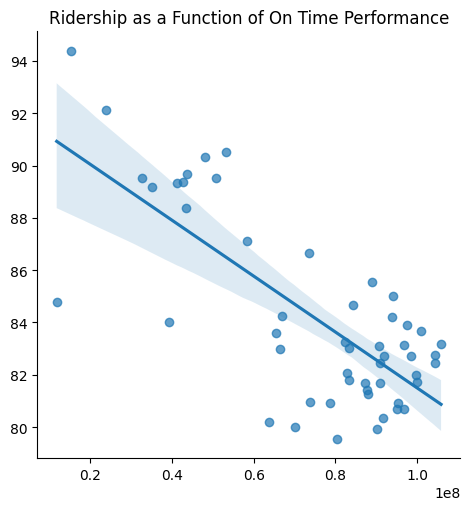

In [160]:
sns.lmplot(x='estimated ridership', y='on_time_percentage', data=rider_otp, scatter_kws={'alpha':.7})
plt.title('Ridership as a Function of On Time Performance')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [161]:
# Lets do a regression analysis between on time performance and delays

keep_otp_delays = ['date', 'total_delays_per_month', 'on_time_percentage']

delay_otp = RFRD[keep_otp_delays]

delay_otp.head()

,date,total_delays_per_month,on_time_percentage
0,2020-03-01,43024.00,86.64
1,2020-04-01,24860.00,84.78
2,2020-05-01,18518.00,94.39
3,2020-06-01,30994.00,92.10
4,2020-07-01,44232.00,89.52


In [164]:
delay_otp.isnull().sum()

date                      0
total_delays_per_month    1
on_time_percentage        1
dtype: int64

In [166]:
delay_otp = delay_otp.dropna(subset=['total_delays_per_month', 'on_time_percentage'])
delay_otp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    52 non-null     datetime64[ns]
 1   total_delays_per_month  52 non-null     float64       
 2   on_time_percentage      52 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


In [168]:
delay_otp.corr()

,date,total_delays_per_month,on_time_percentage
date,1.00,0.75,-0.67
total_delays_per_month,0.75,1.00,-0.92
on_time_percentage,-0.67,-0.92,1.00


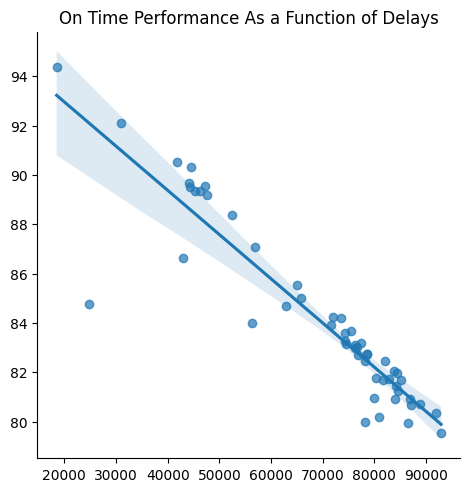

In [170]:
#This may be obvious, but now I know without a doubt that if delays are addressed,
# on time performance will become better, thus encouraging ridership

sns.lmplot(x='total_delays_per_month', y='on_time_percentage', data=delay_otp, scatter_kws={'alpha':.7})
plt.title('On Time Performance As a Function of Delays')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [171]:
# I can see that Ridership is informed by on time performance
# and total delays per month have a very strong correlation with on time performance

# Given this is this high correlated value, I will explore some aspects of the delays and determine:
    # what causes the most delays
    # which trains are most suscetible to delays
# Because train delays are not recorded daily, I must use the delays.csv to exam the different train lines and reasons for delay.
# a more thorough data collection system for particular lines within the MTA system would make this process much easier.
# Recording monthly values per line with attribution to delay reason would also greatly simplify this task.

In [174]:
display(delays)

,date,division,line,day_type,reporting_category,subcategory,delays
0,2024-06,A DIVISION,1,weekday,Crew Availability,Crew Availability,84
1,2024-06,A DIVISION,1,weekday,External Factors,External Debris on Roadbed,5
2,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Braking,36
3,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Door-Related,38
4,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,"Fire, Smoke, Debris",14
...,...,...,...,...,...,...,...
36918,2020-01,Systemwide,Systemwide,weekend,External Factors,Systemwide,348
36919,2020-01,Systemwide,Systemwide,weekend,Infrastructure & Equipment,Systemwide,1480
36920,2020-01,Systemwide,Systemwide,weekend,Operating Conditions,Systemwide,1557
36921,2020-01,Systemwide,Systemwide,weekend,Planned ROW Work,Systemwide,1938


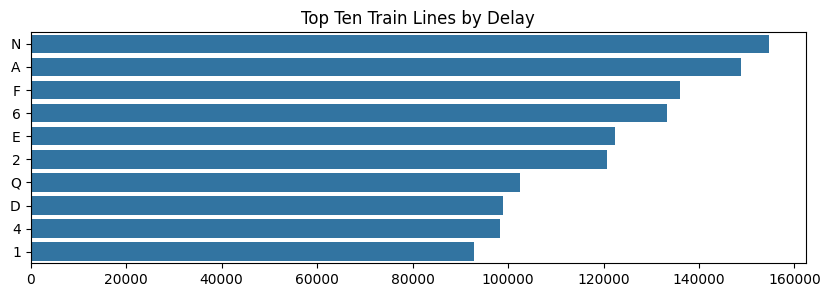

In [176]:
# Now I'll create a bar chart to display the order in which train lines ought to be targeted for maintainence

filtered_lines = delays[delays['line'] != 'Systemwide']
agg_lines = filtered_lines.groupby('line')['delays'].sum().reset_index()
agg_lines = agg_lines.sort_values(by='delays', ascending=False)

top_ten_lines = agg_lines.head(10)

plt.figure(figsize=(10, 3))
sns.barplot(x='delays', y='line', data=top_ten_lines, errorbar=None)
plt.title('Top Ten Train Lines by Delay')
plt.xlabel('')
plt.ylabel('')
plt.show()

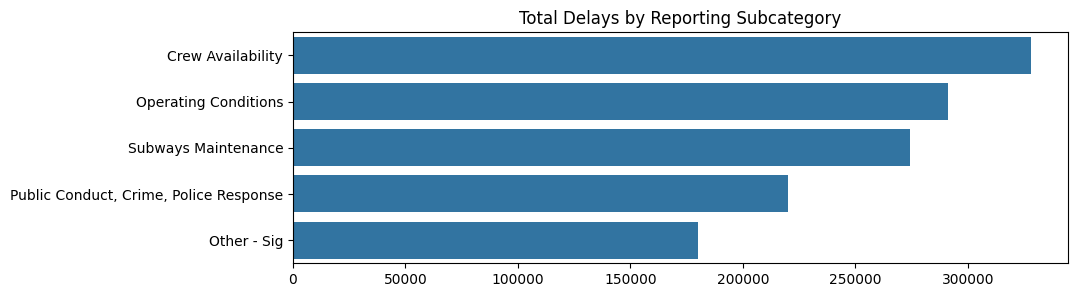

In [179]:
#I'll take a look at the overall subcategory breakdown of delay causes

agg_subcat = delays.groupby('subcategory')['delays'].sum().reset_index()
agg_subcat = agg_subcat[agg_subcat['subcategory'] != 'Systemwide']
agg_subcat = agg_subcat.sort_values(by='delays', ascending=False)

top_5_sc = agg_subcat.head(5)

plt.figure(figsize=(10, 3))
sns.barplot(x='delays', y='subcategory', data=top_5_sc, errorbar=None)
plt.title('Total Delays by Reporting Subcategory')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('')
plt.ylabel('')
plt.xticks
plt.show()

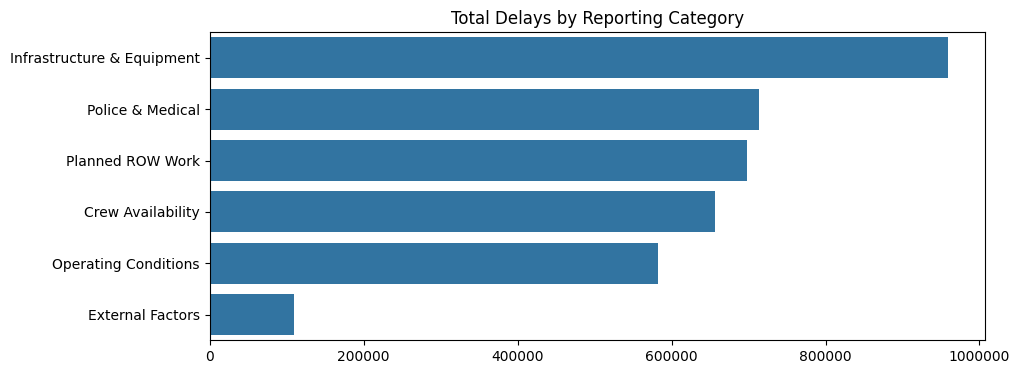

In [181]:
# Now to be more specific I'll plaot a bar chart showing the overall categories that
# make up the most delays reasons

agg_rep = delays.groupby('reporting_category')['delays'].sum().reset_index()
agg_rep = agg_rep.sort_values(by='delays', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x='delays', y='reporting_category', data=agg_rep, errorbar=None)
plt.title('Total Delays by Reporting Category')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('')
plt.ylabel('')
plt.xticks
plt.show()

In [183]:
# I can see that Infrastructure and Equipment issues make up the most amount of delay causes
# Next I will drill into subcategories within Infrasctructure and Equipment

In [185]:
infrastructure_df = delays[delays['reporting_category'] == 'Infrastructure & Equipment']

display(infrastructure_df)

,date,division,line,day_type,reporting_category,subcategory,delays
2,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Braking,36
3,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Door-Related,38
4,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,"Fire, Smoke, Debris",14
5,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Other - CE,70
6,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Other Internal Disruptions,1
...,...,...,...,...,...,...,...
36900,2020-01,B DIVISION,S Rock,weekday,Infrastructure & Equipment,Rail and Roadbed,1
36901,2020-01,B DIVISION,S Rock,weekday,Infrastructure & Equipment,Service Delivery,2
36906,2020-01,B DIVISION,S Rock,weekend,Infrastructure & Equipment,Service Delivery,3
36913,2020-01,Systemwide,Systemwide,weekday,Infrastructure & Equipment,Systemwide,7820


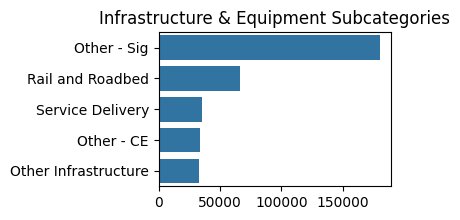

In [187]:
sub = delays[delays['reporting_category'] == 'Infrastructure & Equipment'].groupby('subcategory')['delays'].sum().reset_index()
sub = sub[sub['subcategory'] != 'Systemwide']
sub = sub.sort_values(by='delays', ascending=False)

top_5_sub = sub.head(5)

plt.figure(figsize=(3, 2))
sns.barplot(x='delays', y='subcategory', data=top_5_sub, errorbar=None)
plt.title('Infrastructure & Equipment Subcategories')
plt.xlabel('')
plt.ylabel('')
plt.xticks
plt.show()

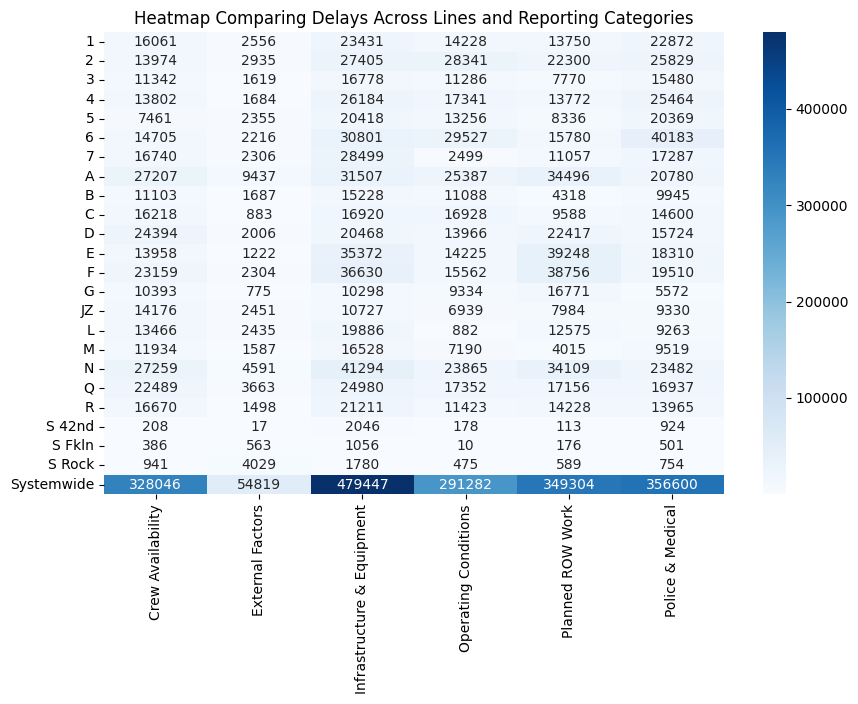

In [189]:
# Looking at a heatmap of delay categories and individual lines,
# I see that no specific lines are affected by any delay category in particular.
# This tells us that the isues are truly systemwide, and thus focus should be on addressing the most problematic categories/subcategories
# in order to benefit the entire system.

pivot_table = delays.pivot_table(values='delays', index='line', columns='reporting_category', aggfunc='sum')


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues')
plt.title('Heatmap Comparing Delays Across Lines and Reporting Categories')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [190]:
delays

,date,division,line,day_type,reporting_category,subcategory,delays
0,2024-06,A DIVISION,1,weekday,Crew Availability,Crew Availability,84
1,2024-06,A DIVISION,1,weekday,External Factors,External Debris on Roadbed,5
2,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Braking,36
3,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,Door-Related,38
4,2024-06,A DIVISION,1,weekday,Infrastructure & Equipment,"Fire, Smoke, Debris",14
...,...,...,...,...,...,...,...
36918,2020-01,Systemwide,Systemwide,weekend,External Factors,Systemwide,348
36919,2020-01,Systemwide,Systemwide,weekend,Infrastructure & Equipment,Systemwide,1480
36920,2020-01,Systemwide,Systemwide,weekend,Operating Conditions,Systemwide,1557
36921,2020-01,Systemwide,Systemwide,weekend,Planned ROW Work,Systemwide,1938
